In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df = pd.read_csv('pollution_2000_2021.csv')
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [ ]:
df.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
df = df[df['City'] == 'New York']

# filter to Date
df= df[df['Date'] >= '2013-01-01']

In [ ]:
df

In [ ]:
df=df[['Date','O3 Mean']]
df.head()

,Date,O3 Mean
357115,2013-01-01,0.023824
357116,2013-01-02,0.020471
357117,2013-01-03,0.013059
357118,2013-01-04,0.016588
357119,2013-01-05,0.014647


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
601802,2021-09-26,0.033294
601803,2021-09-27,0.043412
601804,2021-09-28,0.026714
601805,2021-09-29,0.023529
601806,2021-09-30,0.016250


<Axes: xlabel='ds'>

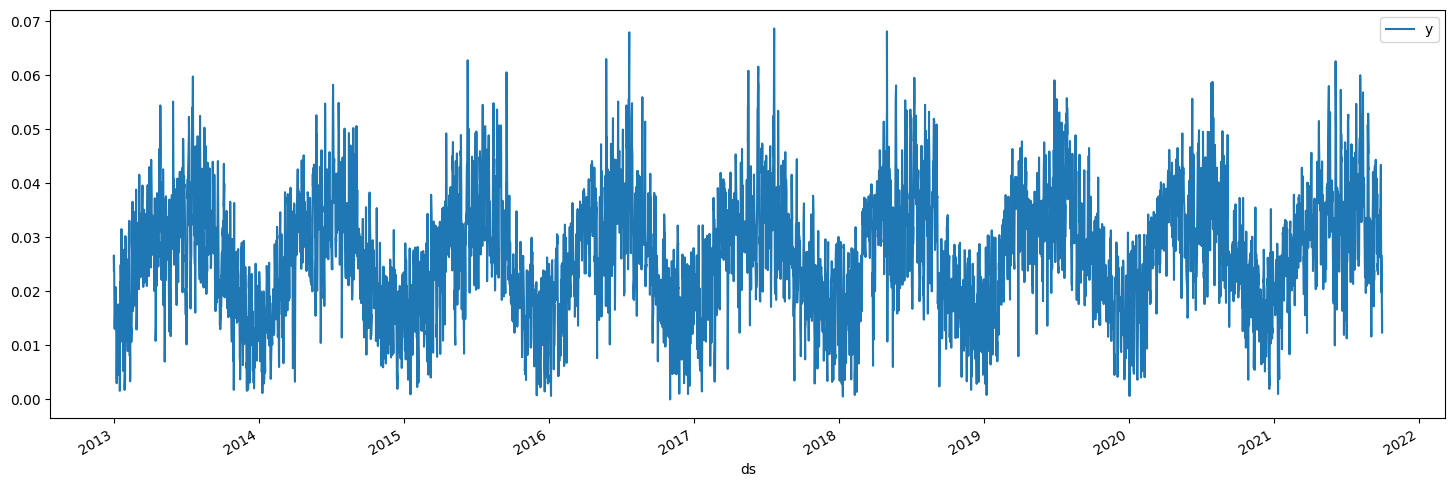

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast= m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvxdrkmj4/d2zkz4jv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvxdrkmj4/vg358tb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34779', 'data', 'file=/tmp/tmpvxdrkmj4/d2zkz4jv.json', 'init=/tmp/tmpvxdrkmj4/vg358tb5.json', 'output', 'file=/tmp/tmpvxdrkmj4/prophet_model1vt3i3yt/prophet_model-20240213081655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:16:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3462,2022-06-26,0.028820,0.028228,0.048291,0.028790,0.028849,0.009355,0.009355,0.009355,0.000814,0.000814,0.000814,0.008541,0.008541,0.008541,0.0,0.0,0.0,0.038176
3463,2022-06-27,0.028821,0.026820,0.047291,0.028792,0.028851,0.008294,0.008294,0.008294,-0.000348,-0.000348,-0.000348,0.008641,0.008641,0.008641,0.0,0.0,0.0,0.037115
3464,2022-06-28,0.028823,0.026776,0.046764,0.028793,0.028852,0.008019,0.008019,0.008019,-0.000720,-0.000720,-0.000720,0.008739,0.008739,0.008739,0.0,0.0,0.0,0.036841
3465,2022-06-29,0.028824,0.027108,0.046136,0.028794,0.028853,0.008330,0.008330,0.008330,-0.000505,-0.000505,-0.000505,0.008835,0.008835,0.008835,0.0,0.0,0.0,0.037154
3466,2022-06-30,0.028825,0.026739,0.047787,0.028795,0.028855,0.008855,0.008855,0.008855,-0.000076,-0.000076,-0.000076,0.008931,0.008931,0.008931,0.0,0.0,0.0,0.037680


In [ ]:
test.tail()

,ds,y
601802,2021-09-26,0.033294
601803,2021-09-27,0.043412
601804,2021-09-28,0.026714
601805,2021-09-29,0.023529
601806,2021-09-30,0.016250


In [ ]:
plot_plotly(m, forecast)